## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.  

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidas na etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.

## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [1]:
# Com a finalidade de automatizar os testes e evitar digitarmos input por input,
# criaremos 2 arquivos CSVs que irão representar 2 momentos do exercício em questão.

# O primeiro momento é formação do condomínio, com os moradores e candidatos à eleição.
# Neste primeiro ponto, utlizaremos um CSV com 3 colunas:
# coluna 1 - Apartamento (apto) = com o número do apartamento 
# coluna 2 - Nome = nome do morador daquele apto.
# coluna 3 - Candidato = um flag para identificar caso o morador seja candidato na eleição do condomínio
# Dessa forma, será possível automatizar a criação dos objetos moradores e 
# candidatos e atrelá-los a um apto.

# Considerando que o condomínio está constituído, o segundo momento é o início da votação.
# Neste ponto, utilizaremos outro CSV com 3 colunas também, simulando o dia de votação:
# coluna 1 - Apartamento (apto) = número do apartamento que está votando, para garantir que não haverá 2 votos do mesmo apto.
# coluna 2 - Nome = nome do morador daquele apto, para registrar quem daquele apto votou.
# coluna 3 - Candidato ID = o ID do candidato que deseja votar.
# coluna 4 - Candidato Nome = o Nome do candidato que deseja votar.

# Classe Condomínio

In [2]:
# biblioteca que auxiliará na construção inicial do dicionário
# from collections import defaultdict  # >> talvez não precise mais.

class Condominio:
    
    def __init__(self):
        """Classe para criação do condomínio.
        Terá toda relação de moradores por apto.
        """
        #self.dict_apartamento = defaultdict(list)
        self.dict_apartamento = {}
        

    def adiciona_apartamento(self, numero_apartamento, nome, candidato):
        """Método para adicionar moradores no condomínio.

        Args:
            numero_apartamento (int): Número do apto do morador. Será passado como atributo para construção dos objetos Morador ou Candidato.
            nome (str): Nome do morador. Será passado como atributo para construção dos objetos Morador ou Candidato.
            candidato (bool): [description]. Se o morador é candidadto ou não nas eleições.

        Returns:
            obj: objeto Morador ou Candidato
            bool: True caso o objeto retornado seja Candidato
        """
        # este flag será usado no programa principal para, a cada nova adição de morador,
        # caso ele seja também candidato, chamar o método "cadastra_candadato" da classe Urna
        
        # >>>  talvez não precise deste flag.... na verificação podemos usar o isinstance(morador, Candidato)
        flg_candidato = False
        # primeiramente verifica se o apto já existe no dicionário condomínio
        if(numero_apartamento not in self.dict_apartamento):
            # caso não exista, ele criar o apto como chave e o padrão de entrada do valor
            # definimos um padrão do valor como uma lista de 2 elementos, onde:
            # índice 0 = boleano, identificando se o apto já possui um candidato cadastrado (True) ou não (False)
            # índice 1 = uma lista dos moradores daquele apto
            self.dict_apartamento[numero_apartamento] = [False,[]]
        
        # verifica se o nome já existe naquele apto
        if(nome not in self.dict_apartamento[numero_apartamento]): 
            # se não existe, verifica se está sendo cadastrado candidato ou "apenas" um morador
            if(candidato == "Sim" and self.dict_apartamento[numero_apartamento][0] == False):
                # só irá criar objeto Candidato caso já não exista um candidato no apto
                morador = Candidato(nome = nome, apartamento = numero_apartamento)
                # flag do índice zero como True para não permitir cadastro de novo candidato neste apto
                self.dict_apartamento[numero_apartamento][0] = True
                flg_candidato = True
            else:
                # caso o cadastro seja de morador ou caso haja uma segunda tentativa de cadastro
                # de candidato no mesmo apto, será craido um objeto Morador
                morador = Morador(nome = nome, apartamento = numero_apartamento)                
        
        # adiciona na lista de moradores (índice = 1) daquele apto (chave od dicionário)
        self.dict_apartamento[numero_apartamento][1].append(morador)
        # este return será usado no programa principal quando a adição for de um Candidato        
        return morador,flg_candidato

# Classe Morador

In [3]:
class Morador:
    
    def __init__(self, nome, apartamento):
        """Classe para criação do morador "básico" do condomínio.

        Args:
            nome (str): Nome do morador. Não permitirá 2 nomes iguais no mesmo apto.
            apartamento (int): Apartamento do morador.
        """
        self.nome = nome
        self.apartamento = apartamento
      
           
    def __repr__(self):        
        return f"apartamento:{self.apartamento}, nome:{self.nome}"

# Classe Candidato

In [4]:
class Candidato(Morador):
  
    def __init__(self, nome, apartamento):
        """Classe para criação do morador que também é candidato.
        É uma classe filha da classe Morador.

        Args:
            nome (str): Nome do morador. Será passado para a classe Morador.
            apartamento (int): Apto do morador. Será passado para a classe Morador.
        """
        super().__init__(nome, apartamento)
        # Criado como None, mas será autalizado pelo método da Urna depois.
        self.__id_candidato = None  # >>> renomear para id_candidato
        # Criado como zero, receberá atualização do método da Urna depois.
        self.__qtd_votos = 0

    @staticmethod
    def atualiza_id(candidato, urna, id_candidato):
        if isinstance(urna, Urna):
            candidato.__id_candidato = id_candidato

    @staticmethod
    def atualiza_votos(candidato, urna, qtde_votos):
        if isinstance(urna, Urna):
            candidato.__qtd_votos = qtde_votos

# Classe Urna

In [5]:
class Urna:

    def __init__(self):
        """Classe para criação da Urna.
        Será responsável pela gestão da eleição.
        Cadastro dos candidatos.
        Apuração dos votos e resultado final.

        Args:
            dict_condominio (dict): Precisa receber o dicionário do condomínio para,
            ao final das votações, verificar quais aptos não votaram.
        """
        self.dict_condominio = None
        # contabilizar votos por candidato
        self.dict_voto_candidato = {}
        # registrar aptos votantes e não permitir 2 votos do mesmo apto
        self.dict_status_ap = {}
        # contabilizar tipos de votos
        self.dict_conta_status = {"válido":0, "nulo":0, "branco":0, "abstenção":0}
        # gerar o id único para cada candidato
        self.id_candidato = 0
        

    def atualiza_base(self, df_condominio):
        self.df_condominio = df_condominio
    
    
    def cadastra_candidato(self, candidato):
        """Método para cadastro dos candidadtos do condomínio.

        Args:
            candidato (obj): objeto Candidato. Importante para retornar para objeto o ID criado.
        """
        # contador para gerar números únicos de IDs
        self.id_candidato += 10
        # inicializar o contador de votos com zero
        # self.dict_voto_candidato[candidato.id_candidato] = 0    
        self.dict_voto_candidato[(self.id_candidato, candidato.nome)] = 0
        return candidato, self.id_candidato
        
    
    def imprimi_votos(self):
        """Retorna lista de votos por candidato
        """
        return self.dict_voto_candidato


    def registra_voto(self, numero_apartamento, morador, id_candidato, candidato_nome):
        """Método para registro dos votos dos moradores.

        Args:
            numero_apartamento (int): Número do apto do morador que está votando
            morador (obj): objeto Morador. Para verificar se o morador é realmente do apto informado.
            id_candidato (int): Número ID do Candidato votado. Caso seja inexistente, será considerado voto Nulo.
            candidato_nome (str): Nome do Candidato votado.

        Returns:
            bool: Confirmando registro de votação.
        """
        # primeiro verifica se o morador realmente é daquele apto informado
        if(morador in self.dict_condominio[numero_apartamento][1]):
            # verifica se já não houve alguma votação de morador do mesmo apto
            # e também se o apto realmente existe
            if((numero_apartamento not in self.dict_status_ap) and (numero_apartamento in self.dict_condominio)):
                # verifica se o ID do candidato existe
                if( (id_candidato, candidato_nome) in self.dict_voto_candidato.keys()):
                    # caso exista, soma um voto para candidato
                    self.dict_voto_candidato[(id_candidato, candidato_nome)] += 1
                    # identifica que apto já votou
                    self.dict_status_ap[numero_apartamento] = True
                    # contabiliza como voto válido 
                    self.dict_conta_status["válido"] += 1
                # caso ID não exista, verifica se morador votou em branco
                elif(id_candidato == 999):
                    self.dict_status_ap[numero_apartamento] = True
                    self.dict_conta_status["branco"] += 1    
                # caso contrário, registra voto Nulo
                else:
                    self.dict_status_ap[numero_apartamento] = True
                    self.dict_conta_status["nulo"] += 1

        return True
    

    def finaliza_urna(self):
        # verificar quais aptos que estão no condomínio não estão presentes no dicionário de votação
        aptos_nao_votaram = [ apto for apto in self.dict_condominio.keys() if apto not in self.dict_status_ap.keys() ]
        abstencao = len(aptos_nao_votaram)
        # atualiza a quantidade para status "abstenção"
        self.dict_conta_status["abstenção"] = abstencao
        # classificando os candidatos por ordem decrescente dos votos
        voto_ordenado = sorted(self.dict_voto_candidato.items(), key=lambda x: x[1], reverse=True)
        # separando informações em 2 listas, para facilitar input do gráfico 
        candidato = [ k for k,v in voto_ordenado]
        votos = [ v for k,v in voto_ordenado]

        return candidato, votos

# Programa Principal

In [6]:
#importação do csv
import pandas as pd

In [7]:
#importa planilha de casos de uso
df_condominio = pd.read_excel('condominio.xlsx')
df_votos = pd.read_excel('votos.xlsx')

In [8]:
#for i, row in df_condominio.iterrows():
#    print(row["Apartamento"], row["Nome"], row["Candidato"])
df_condominio.head()

,Apartamento,Nome,Candidato,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,101,Alice,Sim,NaN,NaN,NaN
1,101,Arthur,Sim,NaN,Alice,10.0
2,101,Helena,Nao,NaN,Julia,20.0
3,102,Bernardo,Nao,NaN,Gabriel,30.0
4,102,Isabela,Nao,NaN,Alessandro,40.0


In [9]:
# chamar as bibliotecas das classes ???
condominio = Condominio()
urna = Urna()

# O primeiro momento: formação do condomínio. -----------------------------------------------
def construir_condominio(df_condominio):
    for i, row in df_condominio.iterrows():
        candidato, flg_candidato = condominio.adiciona_apartamento(row["Apartamento"], row["Nome"], row["Candidato"])
        if flg_candidato == True:
            candidato, id_candidato = urna.cadastra_candidato(candidato)
            Candidato.atualiza_id(candidato, urna, id_candidato)

# Segundo momento: votação. -----------------------------------------------------------------



# Finalizando. ------------------------------------------------------------------------------



In [10]:
#construir_condominio(df_condominio)
condominio.dict_apartamento

{}

In [11]:
# Pessoal atribuindo condominio.dict_apartamento a urna.dict_condominio
######################
#######################
#######################
 
    
urna.dict_condominio = condominio.dict_apartamento

In [12]:
construir_condominio(df_condominio)

In [13]:
for i, row in df_votos.iterrows():
    for morador in urna.dict_condominio[row["Apartamento"]][1]:
        if morador.nome == row["Nome"]:
            urna.registra_voto(row["Apartamento"], morador, row["Voto ID"], row['Voto Nome'])

In [14]:
urna.dict_voto_candidato

{(10, 'Alice'): 2, (20, 'Julia'): 0, (30, 'Gabriel'): 1, (40, 'Alessandro'): 5}

In [15]:
urna.finaliza_urna()

([(40, 'Alessandro'), (10, 'Alice'), (30, 'Gabriel'), (20, 'Julia')],
 [5, 2, 1, 0])

In [16]:
urna.dict_status_ap 

{101: True,
 102: True,
 104: True,
 105: True,
 106: True,
 107: True,
 108: True,
 109: True,
 110: True}

In [17]:
urna.dict_conta_status

{'válido': 8, 'nulo': 0, 'branco': 1, 'abstenção': 1}

In [18]:
import matplotlib.pyplot as plt

def graficoVotos(candidatos, votos):
    plt.bar(candidatos, votos)
    plt.title('Resultado das eleições')
    plt.xlabel('Candidatos')
    plt.ylabel('Votos')
    

In [19]:
urna.finaliza_urna()

([(40, 'Alessandro'), (10, 'Alice'), (30, 'Gabriel'), (20, 'Julia')],
 [5, 2, 1, 0])

In [20]:
candidatos = [urna.finaliza_urna()[0][n][1] for n in range(len(urna.finaliza_urna()[0]))]
    

In [21]:
candidatos

['Alessandro', 'Alice', 'Gabriel', 'Julia']

In [22]:
votos = urna.finaliza_urna()[1]

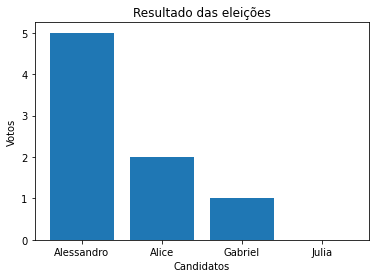

In [23]:
graficoVotos(candidatos, votos)

In [24]:
urna.dict_conta_status

{'válido': 8, 'nulo': 0, 'branco': 1, 'abstenção': 1}

In [25]:
votos_validade = list(urna.dict_conta_status.keys())

In [26]:
votos_validade

['válido', 'nulo', 'branco', 'abstenção']

In [27]:
validacao = list(urna.dict_conta_status.values())

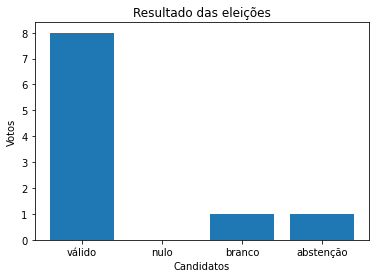

In [28]:
graficoVotos(votos_validade, validacao)